# Test the mountain method

In [1]:
from src.online_learning.change_detection.similarity_based_clustering import mountain_method, largest_cluster
import numpy as np
import matplotlib.pyplot as plt

outliers generation

In [2]:
mean = np.array([5, 10, 15])  
cov = np.array([[10, 4, 3],  
                [4, 20, 5],
                [3, 5, 15]])
n_samples = 500
data_multivariate = np.random.multivariate_normal(mean, cov, n_samples)

In [3]:
low = -10
high = 20
data_uniform = np.random.uniform(low, high, size=(n_samples, 3))

plotting

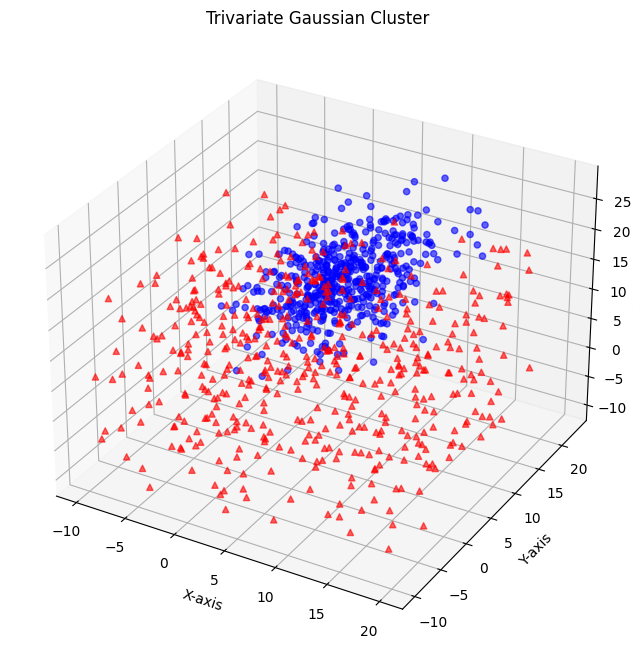

In [4]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_multivariate[:, 0], data_multivariate[:, 1], data_multivariate[:, 2], c='blue', marker='o', alpha=0.6)

ax.scatter(data_uniform[:, 0], data_uniform[:, 1], data_uniform[:, 2], c='red', marker='^', alpha=0.6, label='Uniform Distribution')


ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Trivariate Gaussian Cluster')
plt.show()

In [5]:
data = np.vstack((data_multivariate, data_uniform))
outliers = data_multivariate.tolist()
epsilon = 0.001 # all the previous experiment were done on 0.03
p= 1
radius = 1

In [6]:
print(outliers[2])

[-0.17806644217095524, 4.257024832820471, 14.721251762657197]


In [7]:
centers = mountain_method(outliers=outliers, epsilon=epsilon, radius=radius, p=p)

In [8]:
print(centers)

[array([ 4.95323716,  9.39881041, 15.07497333]), array([ 4.95329554,  9.39896156, 15.07505908]), array([ 4.95322145,  9.39877874, 15.07494818]), array([ 4.95329233,  9.39894796, 15.07505588]), array([ 4.95336287,  9.3991198 , 15.07516277]), array([ 4.95325837,  9.398872  , 15.07500336]), array([ 4.95332174,  9.39903668, 15.07509618]), array([ 4.9533819 ,  9.39917683, 15.07518911]), array([ 4.95319598,  9.39872357, 15.07490724]), array([ 4.95332342,  9.39902548, 15.07510268]), array([ 4.95341413,  9.39925468, 15.07523793]), array([ 4.95333952,  9.39906537, 15.07512676]), array([ 4.95329357,  9.39895847, 15.07505622]), array([ 4.9534257 ,  9.39928472, 15.07525449]), array([ 4.95323892,  9.39883329, 15.074971  ]), array([ 4.95333278,  9.39906342, 15.07511284]), array([ 4.95335394,  9.39910661, 15.07514681]), array([ 4.95321016,  9.39875491, 15.07492959]), array([ 4.95332425,  9.39902327, 15.07510504]), array([ 4.95329926,  9.39897293, 15.07506442]), array([ 4.95334115,  9.39907186, 15.075

In [9]:
print(len(centers))

500


In [10]:
lc = largest_cluster(centers=centers, outliers=outliers, epsilon=epsilon)

In [11]:
print(type(lc))

<class 'list'>


In [12]:
print(len(lc))

500


In [13]:
from src.online_learning.change_detection.minimum_covariance_determinant import mcv_robust_clustering
from src.online_learning.cluster import Cluster

In [14]:
tmp = mcv_robust_clustering(cluster=lc, minimum_datapoints=400)

In [15]:
lc_np = np.array(lc)
if lc_np.ndim == 1:
        print('gay')

In [16]:
print(lc_np.shape)

(500, 3)


In [17]:
tmp

In [18]:
tmp.data_points

array([[ 7.08719425,  2.15004841, 15.77944576],
       [ 7.08719425,  2.15004841, 15.77944576],
       [ 9.56560488,  8.84039362, 13.60437943],
       ...,
       [ 4.12181313,  5.76399066,  9.27320427],
       [ 1.07492229, 10.362676  , 19.09904552],
       [ 4.86391154,  7.75493692, 16.27130156]])

In [19]:
tmp.compute_centroid()

In [20]:
tmp.centroid

array([ 4.98613007,  9.48342454, 15.14500293])

In [21]:
tmp.compute_covariance()

array([[ 9.82710379,  2.71380762,  3.33036436],
       [ 2.71380762, 18.93341057,  4.39102318],
       [ 3.33036436,  4.39102318, 14.89174986]])

In [22]:
tmp.covariance

array([[ 9.82710379,  2.71380762,  3.33036436],
       [ 2.71380762, 18.93341057,  4.39102318],
       [ 3.33036436,  4.39102318, 14.89174986]])